In [20]:
#Se importan las librerías
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import matplotlib.dates as mdates

In [21]:
#Se lee el archivo en excel con los datos meteorológicos de Nogales.
df0 = pd.DataFrame(pd.read_csv("meteo-nogal-09.csv", engine="python"))

In [22]:
df0.head()

,DATE,TIME,Unnamed: 2,Unnamed: 3,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,TS,NaN,NaN,NaN,m/s,m/s,m/s,degC,mV,w/m2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-01-09,00:10,1.0,NaN,1.215,0.506,-0.044,10.95,1.159,-176.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-01-09,00:20,1.0,NaN,0.892,0.588,-0.072,10.81,1.159,-176.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-01-09,00:30,1.0,NaN,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-01-09,00:40,1.0,NaN,1.135,0.7410001,-0.093,9.8,1.258,-182.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df0.dtypes

DATE            object
TIME            object
Unnamed: 2     float64
Unnamed: 3     float64
u_Avg           object
v_Avg           object
w_Avg           object
t_Avg           object
kh20_Avg        object
net_rad_Avg     object
shf1_Avg        object
shf2_Avg        object
vv_Avg          object
airT_Avg        object
rh_Avg         float64
e_sat_Avg       object
e_Avg           object
h2o_hmp_Avg     object
Unnamed: 18    float64
Unnamed: 19     object
Unnamed: 20     object
Unnamed: 21    float64
Unnamed: 22     object
Unnamed: 23     object
Unnamed: 24     object
Unnamed: 25     object
Unnamed: 26     object
Unnamed: 27     object
Unnamed: 28     object
Unnamed: 29     object
Unnamed: 30     object
Unnamed: 31     object
Unnamed: 32     object
Unnamed: 33     object
Unnamed: 34     object
Unnamed: 35     object
dtype: object

In [24]:
#Se eliminan las columnas Unnamed:, y el primer renglón, ya que en el primer renglón están los nombres de las variables, y en el segundo renglón vienen las unidades.
df0 = df0.drop(df0.columns[df0.columns.str.contains('unnamed:', case = False)], axis = 1)
df0 = df0.drop(df0.index[0]).reset_index(drop=True)
df0.head()

,DATE,TIME,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg
0,01-01-09,00:10,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12
1,01-01-09,00:20,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.24,0.896,1.166,1.045,8.02
2,01-01-09,00:30,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001
3,01-01-09,00:40,1.135,0.7410001,-0.093,9.8,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737
4,01-01-09,00:50,0.7550001,1.064,-0.149,8.87,1.332,-184.8,23.22,-26.39,1.359,8.63,0.859,1.119,0.961,7.39


In [25]:
#Se comprueban los tipos de datos.
df0.dtypes

DATE            object
TIME            object
u_Avg           object
v_Avg           object
w_Avg           object
t_Avg           object
kh20_Avg        object
net_rad_Avg     object
shf1_Avg        object
shf2_Avg        object
vv_Avg          object
airT_Avg        object
rh_Avg         float64
e_sat_Avg       object
e_Avg           object
h2o_hmp_Avg     object
dtype: object

In [26]:
#Se crea la variable Fecha con DATE y TIME.
df0["Fecha"] = df0["DATE"] + ' ' + df0["TIME"]

In [27]:
#Se droppean las columnas DATE y TIME.
df0.drop(["DATE","TIME"], axis=1, inplace=True)

In [28]:
#Fecha se convierte a la variable datetime Fechas.
df0["Fechas"] = pd.to_datetime(df0.apply(lambda x: x['Fecha'], 1), dayfirst=True)
df0 = df0.drop(['Fecha'],1)

In [29]:
df0.head()

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,Fechas
0,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12,2009-01-01 00:10:00
1,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.24,0.896,1.166,1.045,8.02,2009-01-01 00:20:00
2,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001,2009-01-01 00:30:00
3,1.135,0.7410001,-0.093,9.8,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737,2009-01-01 00:40:00
4,0.7550001,1.064,-0.149,8.87,1.332,-184.8,23.22,-26.39,1.359,8.63,0.859,1.119,0.961,7.39,2009-01-01 00:50:00


In [30]:
#Se cerciora de nuevo los tipos de variables:
df0.dtypes

u_Avg                  object
v_Avg                  object
w_Avg                  object
t_Avg                  object
kh20_Avg               object
net_rad_Avg            object
shf1_Avg               object
shf2_Avg               object
vv_Avg                 object
airT_Avg               object
rh_Avg                float64
e_sat_Avg              object
e_Avg                  object
h2o_hmp_Avg            object
Fechas         datetime64[ns]
dtype: object

In [31]:
#Se hacen una columnas hasta los minutos:
df0['Mes'] = df0['Fechas'].dt.month
df0['Día'] = df0['Fechas'].dt.day
df0['Hora'] = df0['Fechas'].dt.hour
df0['Minuto'] = df0['Fechas'].dt.minute
df0.head()

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,Fechas,Mes,Día,Hora,Minuto
0,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12,2009-01-01 00:10:00,1.0,1.0,0.0,10.0
1,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.24,0.896,1.166,1.045,8.02,2009-01-01 00:20:00,1.0,1.0,0.0,20.0
2,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001,2009-01-01 00:30:00,1.0,1.0,0.0,30.0
3,1.135,0.7410001,-0.093,9.8,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737,2009-01-01 00:40:00,1.0,1.0,0.0,40.0
4,0.7550001,1.064,-0.149,8.87,1.332,-184.8,23.22,-26.39,1.359,8.63,0.859,1.119,0.961,7.39,2009-01-01 00:50:00,1.0,1.0,0.0,50.0


In [32]:
#Los DataFrames solo coinciden a partir del tercer renglón del DataFrame df0, así que se eliminan los dos primeros renglones de df0.
df0 = df0.drop(df0.index[0:2]).reset_index(drop=True)
df0.head()

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,Fechas,Mes,Día,Hora,Minuto
0,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001,2009-01-01 00:30:00,1.0,1.0,0.0,30.0
1,1.135,0.7410001,-0.093,9.8,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737,2009-01-01 00:40:00,1.0,1.0,0.0,40.0
2,0.7550001,1.064,-0.149,8.87,1.332,-184.8,23.22,-26.39,1.359,8.63,0.859,1.119,0.961,7.39,2009-01-01 00:50:00,1.0,1.0,0.0,50.0
3,0.8850001,0.992,-0.167,8.76,1.45,-183.4,23.33,-26.98,1.39,8.34,0.840,1.097,0.9210001,7.089,2009-01-01 01:00:00,1.0,1.0,1.0,0.0
4,0.611,0.7270001,-0.126,8.72,1.5,-180.6,23.71,-26.72,0.9820001,8.16,0.832,1.084,0.901,6.943,2009-01-01 01:10:00,1.0,1.0,1.0,10.0


In [33]:
#Los datos solo coinciden cada 30 minutos, por lo que se toman solo los valores cada 30 minutos de df0, es decir, solo cuando sean 30 minutos o 00 minutos.
df0 = df0[((df0['Minuto'] == 30.0) | (df0['Minuto'] == 0.0)) & (df0['Fechas']<'2010-01-01 00:30:00')]
df0 = df0.reset_index(drop=True)
df0.tail()

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,Fechas,Mes,Día,Hora,Minuto
17441,1.676,-0.139,14.36,1113,-79.21,NAN,NAN,3.067,14.7,0.407,1.672,0.681,5.126,NaN,2009-12-31 22:00:00,12.0,31.0,22.0,0.0
17442,1.196,-0.12,14.17,1170,-78.89,NAN,NAN,2.683,14.63,0.388,1.664,0.645,4.855,NaN,2009-12-31 22:30:00,12.0,31.0,22.0,30.0
17443,0.454,-0.074,12.63,1060,-72.47,NAN,NAN,2.419,13,0.472,1.497,0.707,5.354,NaN,2009-12-31 23:00:00,12.0,31.0,23.0,0.0
17444,0.746,-0.116,11.9,1043,-74.88,NAN,NAN,2.38,12.3,0.5,1.430,0.715,5.428,NaN,2009-12-31 23:30:00,12.0,31.0,23.0,30.0
17445,0.72,-0.078,11.02,1071,-70.44,NAN,NAN,2.068,11.28,0.521,1.336,0.696,5.299,NaN,2010-01-01 00:00:00,1.0,1.0,0.0,0.0


In [ ]:
#Se procede a hacer un segundo DataFrame con los datos del suelo.

In [56]:
#Se lee el segundo archivo.
df1 = pd.DataFrame(pd.read_csv("soil-nogal-09.csv", engine="python"))
df1.head()

,id,2 Year_RTM L,3 Day_RTM L,4 Hour_Minute_RTM L,5 T108v_1_AVG L,6 T108v_2_AVG L,7 T108v_3_AVG L,8 T108v_4_AVG L,9 T108v_5_AVG L,10 T108v_6_AVG L,...,THETA_20cm.1,THETA_30cm.1,THETA_40cm.1,THETA_55cm.1,THETA_70cm.1,THETA_85cm.1,THETA_100cm.1,62 batt L.1,63 lluvia_TOT L,Rs (splite).1
0,147,2009,1,30,0.959,0.972,0.992,1.004,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,147,2009,1,100,0.958,0.972,0.993,1.004,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,147,2009,1,130,0.956,0.972,0.993,1.004,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,147,2009,1,200,0.955,0.972,0.993,1.005,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,147,2009,1,230,0.953,0.972,0.994,1.005,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df1.dtypes

id                        int64
2 Year_RTM  L             int64
3 Day_RTM  L              int64
4 Hour_Minute_RTM  L      int64
5 T108v_1_AVG  L        float64
6 T108v_2_AVG  L        float64
7 T108v_3_AVG  L        float64
8 T108v_4_AVG  L        float64
9 T108v_5_AVG  L        float64
10 T108v_6_AVG  L       float64
11 T108v_7_AVG  L       float64
12 T108v_8_AVG  L       float64
Tsuelo_10cm             float64
Tsuelo_20cm             float64
Tsuelo_30cm             float64
Tsuelo_40cm             float64
Tsuelo_55cm             float64
Tsuelo_70cm             float64
Tsuelo_85cm             float64
Tsuelo_100cm            float64
21 Tref_AVG  L          float64
22 period_1  L          float64
23 period_2  L          float64
24 period_3  L          float64
25 period_4  L          float64
26 period_5  L          float64
27 period_6  L          float64
28 period_7  L          float64
29 period_8  L          float64
30 TVWC_1  L            float64
                         ...   
35 TVWC_

In [58]:
#Se desean únicamente las columnas: 2, 3, 4, Tsuelo_10cm, Tsuelo_20cm, Tsuelo_30cm, Tsuelo_40cm, Tsuelo_55cm, Tsuelo_70cm, Tsuelo_85cm y Tsuelo_100cm y, para dicho propósito, se usa el comando filter.
df1 =  df1.filter(['2 Year_RTM  L','3 Day_RTM  L','4 Hour_Minute_RTM  L','Tsuelo_10cm','Tsuelo_20cm','Tsuelo_30cm','Tsuelo_40cm','Tsuelo_55cm','Tsuelo_70cm','Tsuelo_85cm','Tsuelo_100cm'], axis=1)
df1.head()

,2 Year_RTM L,3 Day_RTM L,4 Hour_Minute_RTM L,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_30cm,Tsuelo_40cm,Tsuelo_55cm,Tsuelo_70cm,Tsuelo_85cm,Tsuelo_100cm
0,2009,1,30,14.36,14.70,15.22,15.52,16.11,17.02,17.75,18.62
1,2009,1,100,14.33,14.70,15.24,15.52,16.11,17.02,17.75,18.62
2,2009,1,130,14.28,14.69,15.24,15.54,16.11,17.02,17.74,18.62
3,2009,1,200,14.24,14.69,15.25,15.55,16.12,17.02,17.74,18.60
4,2009,1,230,14.19,14.69,15.27,15.55,16.12,17.02,17.73,18.60


In [59]:
#Para crear una columna de fechas, se crearán dos columnas: minutos y horas.
#Las horas están en formato de caracteres (15:30 está como 1530).
df1['4 Hour_Minute_RTM  L'] = df1['4 Hour_Minute_RTM  L'].astype(str)

In [60]:
#Se llenarán las columnas de horas y de minutos.
#Se declararán los arreglos correspondientes.
HORA=[]
MINUTO=[]

#Por medio de un contador i se recorre todo el DataFrame df1
for i in range(0,len(df1)):
    #¿4 caracteres?
    if (len(str(df1['4 Hour_Minute_RTM  L'][i]))==4):
        #¿La hora es 2400? Para cambiarla a 00:00
        if(str(df1['4 Hour_Minute_RTM  L'][i])[0:2]=='24'):
            HORA.append('00')
            MINUTO.append('00')
        else:
            HORA.append(str(df1['4 Hour_Minute_RTM  L'][i])[0:2])
            MINUTO.append(str(df1['4 Hour_Minute_RTM  L'][i])[2:4])
    #¿3 caracteres (las primeras 9 horas)?
    elif (len(str(df1['4 Hour_Minute_RTM  L'][i]))==3):
        #Se guarda en HORA el primer caracter, y en MINUTO los otros dos:
        HORA.append(str(df1['4 Hour_Minute_RTM  L'][i])[0:1])
        MINUTO.append(str(df1['4 Hour_Minute_RTM  L'][i])[1:3])
    #¿2 caracteres (primeros 30 minutos del día)?
    elif (len(str(df1['4 Hour_Minute_RTM  L'][i]))==2):
        HORA.append('00')
        MINUTO.append(str(df1['4 Hour_Minute_RTM  L'][i])[0:2])
        
#Ahora ya se puede escribir el arreglo de los días del DataFrame df1:
DÍAS = [df1['3 Day_RTM  L'][i] for i in range(0,len(df1))]

In [61]:
#Se creará un nuevo DataFrame con los días, horas y minutos del DataFrame df1.
#La variable f guardará las columnas del nuevo DataFrame.
f = {'Día': DÍAS, 'Hora': HORA, 'Minuto': MINUTO}
df_dates = pd.DataFrame(data=f)
df_dates.head()

,Día,Hora,Minuto
0,1,00,30
1,1,1,00
2,1,1,30
3,1,2,00
4,1,2,30


In [62]:
#Se checan los tipos de variables del DataFrame df_dates.
df_dates.dtypes

Día        int64
Hora      object
Minuto    object
dtype: object

In [63]:
#Se crea una columna Días, para aumentar un día a la hora 00:00. Para ello, se establece un arreglo no definido para DÍA:
DÍA=[]

#Se recorre la variable n a lo largo del DataFrame df_dates.
for n in range(0,len(df_dates)):
    if (df_dates['Hora'][n]=='00' and df_dates['Minuto'][n]=='00'):
        DÍA.append(df_dates['Día'][n]+1)
    else:
        DÍA.append(df_dates['Día'][n])
df_dates['Días']=DÍA

In [64]:
df_dates.head()

,Día,Hora,Minuto,Días
0,1,00,30,1
1,1,1,00,1
2,1,1,30,1
3,1,2,00,1
4,1,2,30,1


In [65]:
#Ahora se procede a crear una variable de tipo string para el año, el número de día, hora y minuto.
#Se declara un arreglo.
fechas=[]

#Se contea la variable i por todo el DataFrame df1:
for i in range(0,len(df1)):
    fechas.append('2009 ' + str(df_dates['Días'][i]) + ' ' + df_dates['Hora'][i] + ' ' + df_dates['Minuto'][i])

In [66]:
#Ahora, ese arreglo de fechas se pasa a ser una variable tipo Datetime, así que se crea el arreglo FECHA para ir guardando las variables temporales.
FECHA=[]

#Se recorre la variable i en todo el arreglo df1:
for i in range(0,len(df1)):
    w = datetime.datetime.strptime(fechas[i],'%Y %j %H %M')
    F = w.isoformat(' ')
    FECHA.append(F)

In [67]:
#Se agrega la columna Fechas al DataFrame df1:
df1['Fecha'] = FECHA
df1.tail()

,2 Year_RTM L,3 Day_RTM L,4 Hour_Minute_RTM L,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_30cm,Tsuelo_40cm,Tsuelo_55cm,Tsuelo_70cm,Tsuelo_85cm,Tsuelo_100cm,Fecha
17477,2009,365,2200,13.96,14.13,14.82,15.23,15.72,16.56,17.27,18.14,2009-12-31 22:00:00
17478,2009,365,2230,13.96,14.15,14.83,15.23,15.72,16.56,17.27,18.14,2009-12-31 22:30:00
17479,2009,365,2300,13.96,14.16,14.83,15.24,15.72,16.55,17.27,18.14,2009-12-31 23:00:00
17480,2009,365,2330,13.95,14.16,14.85,15.24,15.72,16.55,17.26,18.14,2009-12-31 23:30:00
17481,2009,365,2400,13.94,14.19,14.85,15.24,15.72,16.55,17.26,18.13,2010-01-01 00:00:00


In [68]:
df1.dtypes

2 Year_RTM  L             int64
3 Day_RTM  L              int64
4 Hour_Minute_RTM  L     object
Tsuelo_10cm             float64
Tsuelo_20cm             float64
Tsuelo_30cm             float64
Tsuelo_40cm             float64
Tsuelo_55cm             float64
Tsuelo_70cm             float64
Tsuelo_85cm             float64
Tsuelo_100cm            float64
Fecha                    object
dtype: object

In [69]:
#Se convierte la variable Fechas a Datetime
df1['Fechas'] = pd.to_datetime(df1.apply(lambda x: x['Fecha'], 1), dayfirst=True)
df1 = df1.drop(['Fecha'],1)

In [70]:
df1.dtypes

2 Year_RTM  L                    int64
3 Day_RTM  L                     int64
4 Hour_Minute_RTM  L            object
Tsuelo_10cm                    float64
Tsuelo_20cm                    float64
Tsuelo_30cm                    float64
Tsuelo_40cm                    float64
Tsuelo_55cm                    float64
Tsuelo_70cm                    float64
Tsuelo_85cm                    float64
Tsuelo_100cm                   float64
Fechas                  datetime64[ns]
dtype: object

In [71]:
len(df1)

17482

In [72]:
#Se droppean los duplicados del df1
df1 = df1.drop_duplicates(subset=['Fechas'])

In [73]:
len(df1)

17426

In [74]:
df0.dtypes

u_Avg                  object
v_Avg                  object
w_Avg                  object
t_Avg                  object
kh20_Avg               object
net_rad_Avg            object
shf1_Avg               object
shf2_Avg               object
vv_Avg                 object
airT_Avg               object
rh_Avg                float64
e_sat_Avg              object
e_Avg                  object
h2o_hmp_Avg            object
Fechas         datetime64[ns]
Mes                   float64
Día                   float64
Hora                  float64
Minuto                float64
dtype: object

In [75]:
len(df0)

17392

In [76]:
#Se quitan los duplicados del DataFrame df0.
df0 = df0.drop_duplicates(subset=['Fechas'])

In [77]:
len(df0)

17392

In [78]:
#Para unir los dos DataFrames, se procede a relacionarlos por medio de la variable Fechas.
#Se crea un nuevo DataFrame df2.
df2 = pd.merge(df0,df1, on=['Fechas'])

In [79]:
df2.head()

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,...,3 Day_RTM L,4 Hour_Minute_RTM L,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_30cm,Tsuelo_40cm,Tsuelo_55cm,Tsuelo_70cm,Tsuelo_85cm,Tsuelo_100cm
0,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,...,1,30,14.36,14.70,15.22,15.52,16.11,17.02,17.75,18.62
1,0.8850001,0.992,-0.167,8.76,1.45,-183.4,23.33,-26.98,1.39,8.34,...,1,100,14.33,14.70,15.24,15.52,16.11,17.02,17.75,18.62
2,0.118,1.321,-0.071,8.69,1.422,-187.8,24.04,-27.16,1.338,7.539001,...,1,130,14.28,14.69,15.24,15.54,16.11,17.02,17.74,18.62
3,0.7550001,1.193,-0.149,7.612,1.36,-174,20.87,-21.68,1.457,6.76,...,1,200,14.24,14.69,15.25,15.55,16.12,17.02,17.74,18.60
4,1.08,0.839,-0.149,7.761,1.404,-170.7,18.15,-21.55,1.422,7.288001,...,1,230,14.19,14.69,15.27,15.55,16.12,17.02,17.73,18.60


In [80]:
df2.tail()

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,...,3 Day_RTM L,4 Hour_Minute_RTM L,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_30cm,Tsuelo_40cm,Tsuelo_55cm,Tsuelo_70cm,Tsuelo_85cm,Tsuelo_100cm
17365,1.676,-0.139,14.36,1113,-79.21,NAN,NAN,3.067,14.7,0.407,...,365,2200,13.96,14.13,14.82,15.23,15.72,16.56,17.27,18.14
17366,1.196,-0.12,14.17,1170,-78.89,NAN,NAN,2.683,14.63,0.388,...,365,2230,13.96,14.15,14.83,15.23,15.72,16.56,17.27,18.14
17367,0.454,-0.074,12.63,1060,-72.47,NAN,NAN,2.419,13,0.472,...,365,2300,13.96,14.16,14.83,15.24,15.72,16.55,17.27,18.14
17368,0.746,-0.116,11.9,1043,-74.88,NAN,NAN,2.38,12.3,0.5,...,365,2330,13.95,14.16,14.85,15.24,15.72,16.55,17.26,18.14
17369,0.72,-0.078,11.02,1071,-70.44,NAN,NAN,2.068,11.28,0.521,...,365,2400,13.94,14.19,14.85,15.24,15.72,16.55,17.26,18.13


In [81]:
#Se reduce el DataFrame a uno que posea únicamente las variables requeridas, las cuales son: Fechas, Tsuelo_10cm, Tsuelo_20cm, Tsuelo_30cm, Tsuelo_40cm, Tsuelo_55cm, Tsuelo_70cm, Tsuelo_85cm, Tsuelo_100cm, t_Avg, air_Avg, net_rad_Avg y airT_Avg.
df2 = df2.filter(['Fechas','Tsuelo_10cm','Tsuelo_20cm','Tsuelo_30cm','Tsuelo_40cm','Tsuelo_55cm','Tsuelo_70cm','Tsuelo_85cm','Tsuelo_100cm','t_Avg','air_Avg','net_rad_Avg','airT_Avg'],axis=1)
df2.head()

,Fechas,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_30cm,Tsuelo_40cm,Tsuelo_55cm,Tsuelo_70cm,Tsuelo_85cm,Tsuelo_100cm,t_Avg,net_rad_Avg,airT_Avg
0,2009-01-01 00:30:00,14.36,14.70,15.22,15.52,16.11,17.02,17.75,18.62,10.34,-175.5,9.059999
1,2009-01-01 01:00:00,14.33,14.70,15.24,15.52,16.11,17.02,17.75,18.62,8.76,-183.4,8.34
2,2009-01-01 01:30:00,14.28,14.69,15.24,15.54,16.11,17.02,17.74,18.62,8.69,-187.8,7.539001
3,2009-01-01 02:00:00,14.24,14.69,15.25,15.55,16.12,17.02,17.74,18.60,7.612,-174,6.76
4,2009-01-01 02:30:00,14.19,14.69,15.27,15.55,16.12,17.02,17.73,18.60,7.761,-170.7,7.288001


In [82]:
len(df2)

17370

In [83]:
#Se va a seleccionar un día de Enero, y se va a graficar la temperatura del aire, y las 4 temperaturas del subsuelo.
#El día es el 12 de Enero.

#Creamos una DataFrame para los valores de la gráfica del 4 de Enero.
df_graph1 = df2[df2['Fechas']<'2009-01-12']
df_graph1_s = df_graph1.filter(['Tsuelo_10cm','Tsuelo_20cm','Tsuelo_40cm','Tsuelo_85cm'],axis=1)

#Y se convierte a float64 las variables object para operar con los números.
df_graph1 = df_graph1.apply(pd.to_numeric, errors='coerce')
df_graph1_s.head()

,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_40cm,Tsuelo_85cm
0,14.36,14.70,15.52,17.75
1,14.33,14.70,15.52,17.75
2,14.28,14.69,15.54,17.74
3,14.24,14.69,15.55,17.74
4,14.19,14.69,15.55,17.73


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 864x595.44 with 0 Axes>

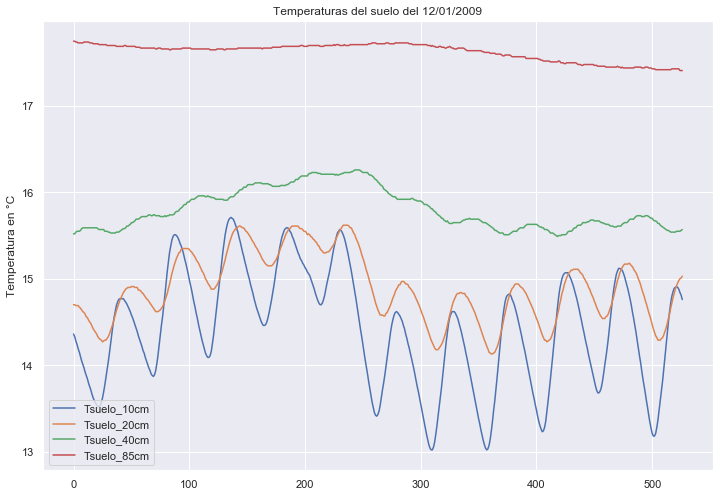

In [84]:
#Temperaturas del suelo del 12/01/2009

sns.set(rc={'figure.figsize':(12,8.27)})
fig=plt.figure(); df_graph1_s.plot(); plt.legend(loc='best')
plt.title("Temperaturas del suelo del 12/01/2009")
plt.ylabel("Temperatura en °C")
plt.grid(True)
fig.savefig("TemperaturaSueloDia",plt=2000)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

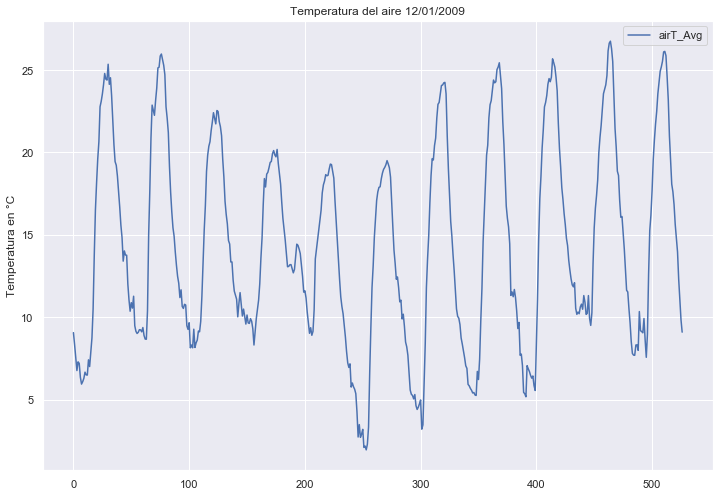

In [85]:
#Se hace la gráfica de la temperatura del aire para el 12/01/2009
sns.set(rc={'figure.figsize':(12,8.27)})
fig=plt.figure(); df_graph1["airT_Avg"].plot(); plt.legend(loc='best')
plt.title("Temperatura del aire 12/01/2009")
plt.ylabel("Temperatura en °C")
plt.grid(True)
fig.savefig("TemperaturaAireDía",plt=2000)
plt.show

In [86]:
#Se va a realizar una gráfica de temperaturas T_max, T_min y T_promedio diarias para todo 2009.
#Se hará un nuevo DataFrame
df_graph2 = df2

#Variables para el día y el mes
df_graph2['Día'] = df_graph2['Fechas'].dt.day
df_graph2['Mes'] = df_graph2['Fechas'].dt.month

#Se crea un DataFrame para cada una de las 4 temperaturas del suelo: 10, 20, 40 y 85.
#Se calcula la temperatura máxima, mínima y promedio.

#DataFrame para la temperatura del suelo a los 10 cm
df_10 = df_graph2.filter(['Día','Mes','Tsuelo_10cm'],axis=1)
df_10["Tsuelo_10cm_max"] = np.round(df_10.groupby(["Mes","Día"])["Tsuelo_10cm"].transform("max"),decimals=1)
df_10["Tsuelo_10cm_min"] = np.round(df_10.groupby(["Mes","Día"])["Tsuelo_10cm"].transform("min"),decimals=1)
df_10["Tsuelo_10cm_mean"] = np.round(df_10.groupby(["Mes","Día"])["Tsuelo_10cm"].transform("mean"),decimals=1)
#Se quitan los datos que no se van a graficar.
df_10 = df_10.drop(['Tsuelo_10cm','Día','Mes'],1)

#DataFrame para la temperatura del suelo a los 20 cm
df_20 = df_graph2.filter(['Día','Mes','Tsuelo_20cm'],axis=1)
df_20["Tsuelo_20cm_max"] = np.round(df_20.groupby(["Mes","Día"])["Tsuelo_20cm"].transform("max"),decimals=1)
df_20["Tsuelo_20cm_min"] = np.round(df_20.groupby(["Mes","Día"])["Tsuelo_20cm"].transform("min"),decimals=1)
df_20["Tsuelo_20cm_mean"] = np.round(df_20.groupby(["Mes","Día"])["Tsuelo_20cm"].transform("mean"),decimals=1)
#Quitamos los datos que no se van a graficar.
df_20 = df_20.drop(['Tsuelo_20cm','Día','Mes'],1)

#DataFrame para la temperatura del suelo a los 40 cm
df_40 = df_graph2.filter(['Día','Mes','Tsuelo_40cm'],axis=1)
df_40["Tsuelo_40cm_max"] = np.round(df_40.groupby(["Mes","Día"])["Tsuelo_40cm"].transform("max"),decimals=1)
df_40["Tsuelo_40cm_min"] = np.round(df_40.groupby(["Mes","Día"])["Tsuelo_40cm"].transform("min"),decimals=1)
df_40["Tsuelo_40cm_mean"] = np.round(df_40.groupby(["Mes","Día"])["Tsuelo_40cm"].transform("mean"),decimals=1)
#Quitamos los datos que no se van a graficar.
df_40 = df_40.drop(['Tsuelo_40cm','Día','Mes'],1)

#DataFrame para la temperatura del suelo a los 85 cm
df_85 = df_graph2.filter(['Día','Mes','Tsuelo_85cm'],axis=1)
df_85["Tsuelo_85cm_max"] = np.round(df_85.groupby(["Mes","Día"])["Tsuelo_85cm"].transform("max"),decimals=1)
df_85["Tsuelo_85cm_min"] = np.round(df_85.groupby(["Mes","Día"])["Tsuelo_85cm"].transform("min"),decimals=1)
df_85["Tsuelo_85cm_mean"] = np.round(df_85.groupby(["Mes","Día"])["Tsuelo_85cm"].transform("mean"),decimals=1)
#Quitamos los datos que no se van a graficar.
df_85 = df_85.drop(['Tsuelo_85cm','Día','Mes'],1)

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 864x595.44 with 0 Axes>

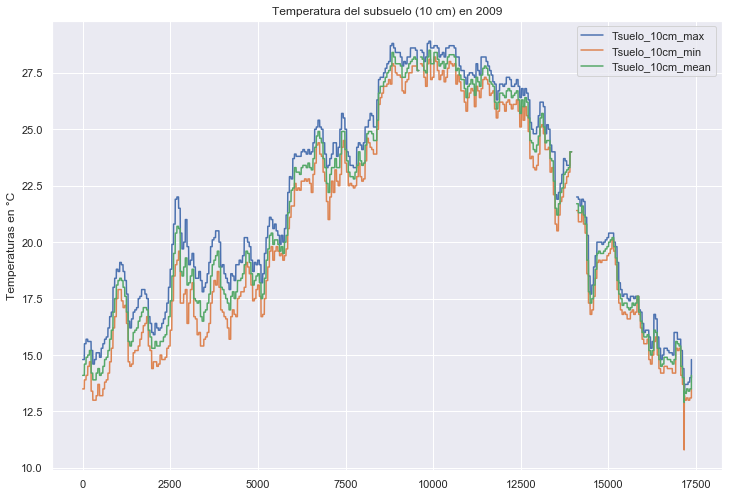

In [87]:
#Gráfica para la Tsuelo_10cm
sns.set(rc={'figure.figsize':(12,8.27)})
fig=plt.figure(); df_10.plot(); plt.legend(loc='best')
plt.title("Temperatura del subsuelo (10 cm) en 2009")
plt.ylabel("Temperaturas en °C")
plt.grid(True)
fig.savefig("T10",plt=2000)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 864x595.44 with 0 Axes>

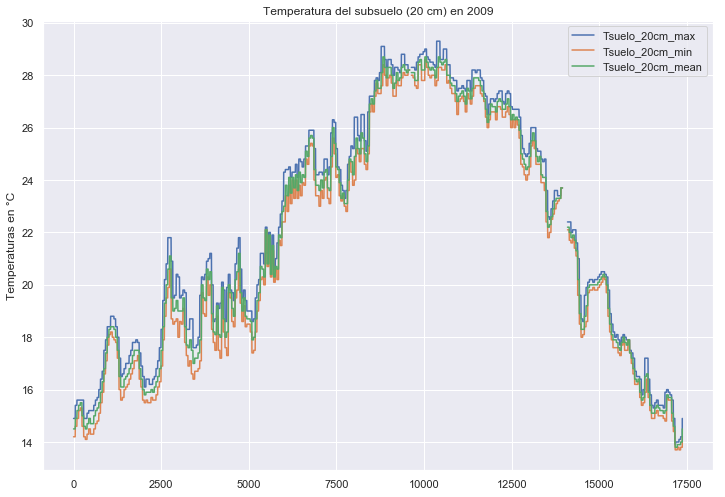

In [88]:
#Gráfica para la Tsuelo_20cm
sns.set(rc={'figure.figsize':(12,8.27)})
fig=plt.figure(); df_20.plot(); plt.legend(loc='best')
plt.title("Temperatura del subsuelo (20 cm) en 2009")
plt.ylabel("Temperaturas en °C")
plt.grid(True)
fig.savefig("T20",plt=2000)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 864x595.44 with 0 Axes>

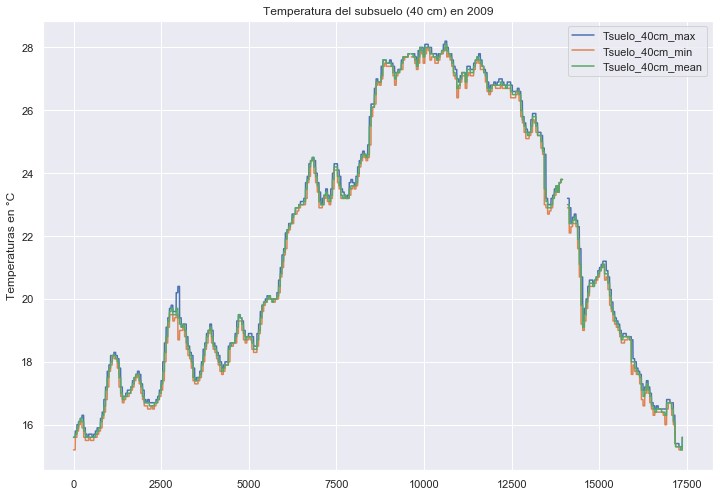

In [89]:
#Gráfica para la Tsuelo_40cm
sns.set(rc={'figure.figsize':(12,8.27)})
fig=plt.figure(); df_40.plot(); plt.legend(loc='best')
plt.title("Temperatura del subsuelo (40 cm) en 2009")
plt.ylabel("Temperaturas en °C")
plt.grid(True)
fig.savefig("T40",plt=2000)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 864x595.44 with 0 Axes>

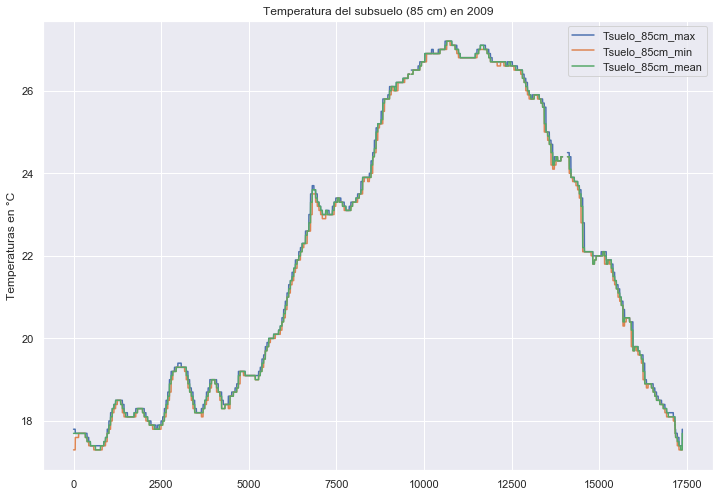

In [90]:
#Gráfica para la Tsuelo_85cm
sns.set(rc={'figure.figsize':(12,8.27)})
fig=plt.figure(); df_85.plot(); plt.legend(loc='best')
plt.title("Temperatura del subsuelo (85 cm) en 2009")
plt.ylabel("Temperaturas en °C")
plt.grid(True)
fig.savefig("T85",plt=2000)
plt.show

In [91]:
#Se realiza la gráfica de la temperatura del aire, así que se crea otro DataFrame solo con la temperatura del aire.
df_graph2 = df_graph2.filter(['Día','Mes','airT_Avg'],axis=1)
df_graph2.head()

,Día,Mes,airT_Avg
0,1,1,9.059999
1,1,1,8.34
2,1,1,7.539001
3,1,1,6.76
4,1,1,7.288001


In [92]:
#Se convierten los datos de la temperatura del aire a float64.
df_graph2[df_graph2.columns[1:3]]=df_graph2[df_graph2.columns[1:3]].apply(pd.to_numeric,errors='coerce')
df_graph2.dtypes

Día           int64
Mes           int64
airT_Avg    float64
dtype: object

In [93]:
#Se agrupa por medio de groupby y transform para obtener la temperatura máxima, mínima y promedio del aire.
df_graph2["airT_Avg_max"] = np.round(df_graph2.groupby(["Mes","Día"])["airT_Avg"].transform("max"),decimals=1)
df_graph2["airT_Avg_min"] = np.round(df_graph2.groupby(["Mes","Día"])["airT_Avg"].transform("min"),decimals=1)
df_graph2["airT_Avg_mean"] = np.round(df_graph2.groupby(["Mes","Día"])["airT_Avg"].transform("mean"),decimals=1)

#Y se eliminan las columnas que no se utilizarán para esta gráfica
df_graph2 = df_graph2.drop(['airT_Avg','Día','Mes'], 1)
df_graph2.head()

,airT_Avg_max,airT_Avg_min,airT_Avg_mean
0,25.4,0.5,14.7
1,25.4,0.5,14.7
2,25.4,0.5,14.7
3,25.4,0.5,14.7
4,25.4,0.5,14.7


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 864x595.44 with 0 Axes>

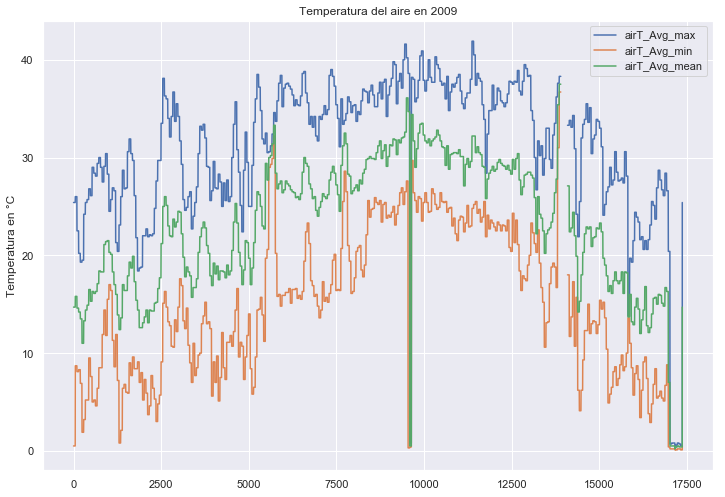

In [94]:
#Se crea la gráfica de la temperatura del aire promedio, máxima y mínima.
sns.set(rc={'figure.figsize':(12,8.27)})
fig=plt.figure(); df_graph2.plot(); plt.legend(loc='best')
plt.title("Temperatura del aire en 2009")
plt.ylabel("Temperatura en °C")
plt.grid(True)
fig.savefig("TemperaturaAire",plt=2000)
plt.show

In [95]:
#Se va a calcular el promedio cada 30 minutos durante el día para el mes de Enero de la temperatura del aire y las 8 temperaturas promedio del subsuelo, para posteriormente graficar la variación en 24 horas de las temperaturas de interés.

#Se reduce el DataFrame para tener solo datos de Enero
df_graph3 = df2[df2['Fechas']<'2009-02-01 00:00:00']

#Se toman las temperaturas del suelo
df_graph3_s = df_graph3.filter(['Tsuelo_10cm','Tsuelo_20cm','Tsuelo_30cm','Tsuelo_40cm','Tsuelo_55cm','Tsuelo_70cm','Tsuelo_85cm','Tsuelo_100cm'],axis=1)

#Se muestra el nuevo DataFrame
df_graph3_s.head()

,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_30cm,Tsuelo_40cm,Tsuelo_55cm,Tsuelo_70cm,Tsuelo_85cm,Tsuelo_100cm
0,14.36,14.70,15.22,15.52,16.11,17.02,17.75,18.62
1,14.33,14.70,15.24,15.52,16.11,17.02,17.75,18.62
2,14.28,14.69,15.24,15.54,16.11,17.02,17.74,18.62
3,14.24,14.69,15.25,15.55,16.12,17.02,17.74,18.60
4,14.19,14.69,15.27,15.55,16.12,17.02,17.73,18.60


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 864x595.44 with 0 Axes>

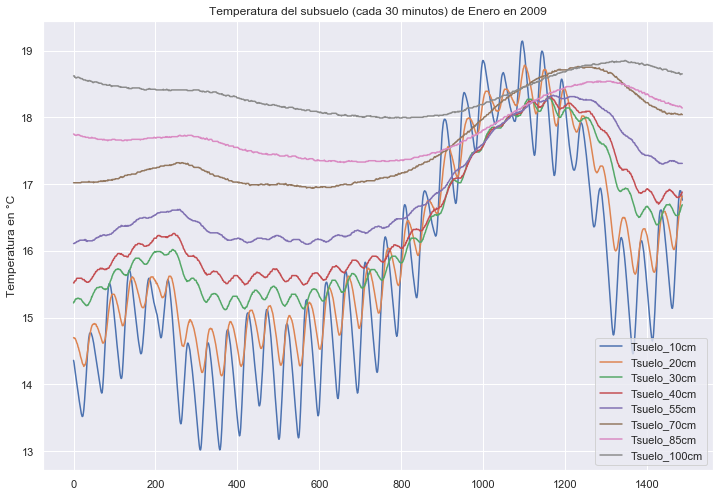

In [96]:
#Se grafican las temperaturas del suelo cada media hora de Enero en 2009. 

sns.set(rc={'figure.figsize':(12,8.27)})
fig=plt.figure(); df_graph3_s.plot(); plt.legend(loc='best')
plt.title("Temperatura del subsuelo (cada 30 minutos) de Enero en 2009")
plt.ylabel("Temperatura en °C")
plt.grid(True)
fig.savefig("TemperaturaSuelo30Enero",plt=2000)
plt.show

In [97]:
#Ahora se grafica la temperatura del aire cada 30 minutos.
df_graph3 = df_graph3.filter(['airT_Avg'],axis=1)
df_graph3 = df_graph3.apply(pd.to_numeric,errors='coerce')

df_graph3.dtypes

airT_Avg    float64
dtype: object

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 864x595.44 with 0 Axes>

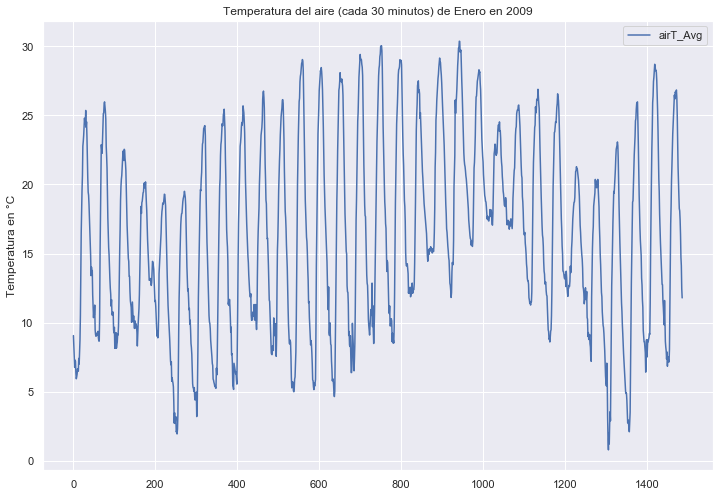

In [98]:
#Y ahora se hace la gráfica de temperatura del aire.
sns.set(rc={'figure.figsize':(12,8.27)})
fig=plt.figure(); df_graph3.plot(); plt.legend(loc='best')
plt.title("Temperatura del aire (cada 30 minutos) de Enero en 2009")
plt.ylabel("Temperatura en °C")
plt.grid(True)
fig.savefig("TemperaturaAire30Enero",plt=2000)
plt.show

In [99]:
#Se introduce el concepto promedio móvil (rolling mean) como método de suavizar la evolución temporal de una serie de tiempo, y se pide reproducir dichas gráficas.
#Agregamos de nuevo la variable Fechas:
df_10['Fechas'] = df2['Fechas']
df_20['Fechas'] = df2['Fechas']
df_40['Fechas'] = df2['Fechas']
df_85['Fechas'] = df2['Fechas']
df_graph2['Fechas'] = df2['Fechas']

#Se crea un nuevo DataFrame para los promedio móviles.
df_10roll = pd.DataFrame()
df_20roll = pd.DataFrame()
df_40roll = pd.DataFrame()
df_85roll = pd.DataFrame()
df_airTroll = pd.DataFrame()

#Ahora se calcula el promedio móvil de cada una de las temperaturas.
df_10roll["max10"] = df_10.Tsuelo_10cm_max.rolling(60, min_periods=1).mean()
df_10roll["min10"] = df_10.Tsuelo_10cm_min.rolling(60, min_periods=1).mean()
df_10roll["mean10"] = df_10.Tsuelo_10cm_mean.rolling(60, min_periods=1).mean()

df_20roll["max20"] = df_20.Tsuelo_20cm_max.rolling(60, min_periods=1).mean()
df_20roll["min20"] = df_20.Tsuelo_20cm_min.rolling(60, min_periods=1).mean()
df_20roll["mean20"] = df_20.Tsuelo_20cm_mean.rolling(60, min_periods=1).mean()

df_40roll["max40"] = df_40.Tsuelo_40cm_max.rolling(60, min_periods=1).mean()
df_40roll["min40"] = df_40.Tsuelo_40cm_min.rolling(60, min_periods=1).mean()
df_40roll["mean40"] = df_40.Tsuelo_40cm_mean.rolling(60, min_periods=1).mean()

df_85roll["max85"] = df_85.Tsuelo_85cm_max.rolling(60, min_periods=1).mean()
df_85roll["min85"] = df_85.Tsuelo_85cm_min.rolling(60, min_periods=1).mean()
df_85roll["mean85"] = df_85.Tsuelo_85cm_mean.rolling(60, min_periods=1).mean()

df_airTroll["max_air"] = df_graph2.airT_Avg_max.rolling(60, min_periods=1).mean()
df_airTroll["min_air"] = df_graph2.airT_Avg_min.rolling(60, min_periods=1).mean()
df_airTroll["mean_air"] = df_graph2.airT_Avg_mean.rolling(60, min_periods=1).mean()

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 864x595.44 with 0 Axes>

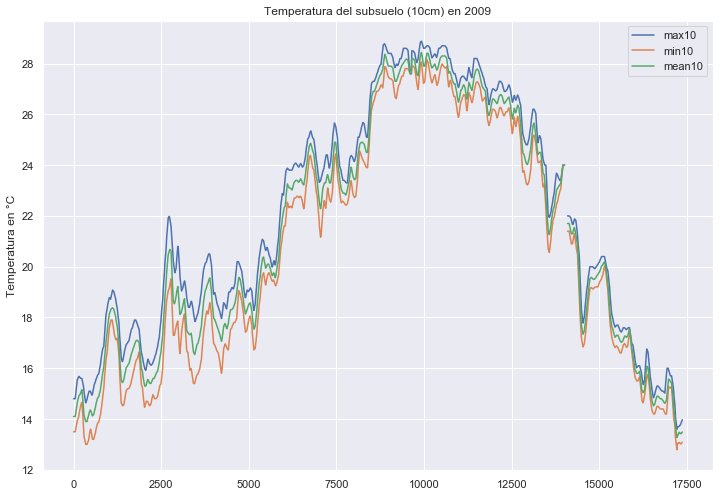

In [100]:
#Gráfica suavizada de la temperatura del suelo 10 cm
sns.set(rc={'figure.figsize':(12,8.27)})
fig=plt.figure(); df_10roll.plot(); plt.legend(loc='best')
plt.title("Temperatura del subsuelo (10cm) en 2009")
plt.ylabel("Temperatura en °C")
plt.grid(True)
fig.savefig("Temperatura10roll",plt=2000)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 864x595.44 with 0 Axes>

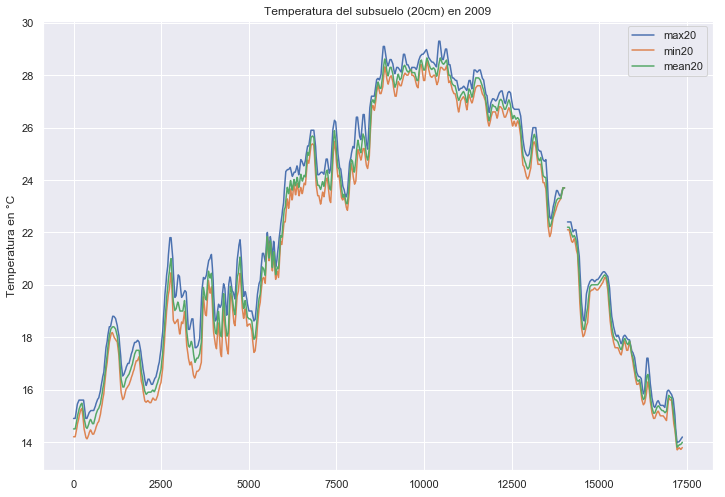

In [101]:
#Gráfica suavizada de la temperatura del suelo 20 cm
sns.set(rc={'figure.figsize':(12,8.27)})
fig=plt.figure(); df_20roll.plot(); plt.legend(loc='best')
plt.title("Temperatura del subsuelo (20cm) en 2009")
plt.ylabel("Temperatura en °C")
plt.grid(True)
fig.savefig("Temperatura20roll",plt=2000)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 864x595.44 with 0 Axes>

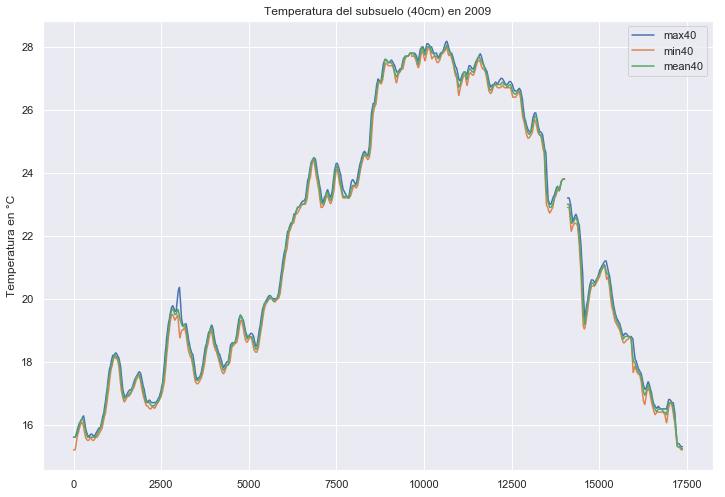

In [102]:
#Gráfica suavizada de la temperatura del suelo 40 cm
sns.set(rc={'figure.figsize':(12,8.27)})
fig=plt.figure(); df_40roll.plot(); plt.legend(loc='best')
plt.title("Temperatura del subsuelo (40cm) en 2009")
plt.ylabel("Temperatura en °C")
plt.grid(True)
fig.savefig("Temperatura40roll",plt=2000)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 864x595.44 with 0 Axes>

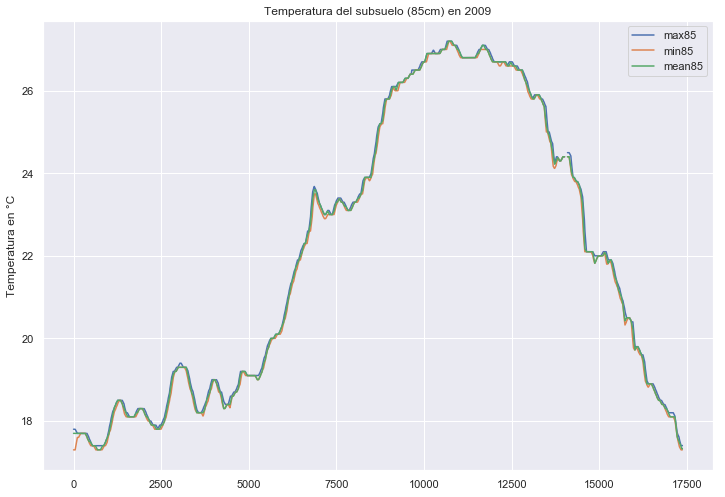

In [103]:
#Gráfica suavizada de la temperatura del suelo 85 cm
sns.set(rc={'figure.figsize':(12,8.27)})
fig=plt.figure(); df_85roll.plot(); plt.legend(loc='best')
plt.title("Temperatura del subsuelo (85cm) en 2009")
plt.ylabel("Temperatura en °C")
plt.grid(True)
fig.savefig("Temperatura85roll",plt=2000)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 864x595.44 with 0 Axes>

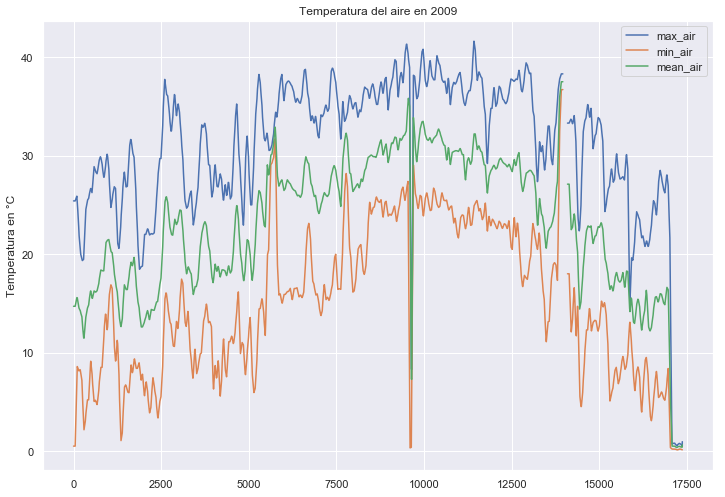

In [104]:
#Gráfica suavizada de la temperatura del aire
sns.set(rc={'figure.figsize':(12,8.27)})
fig=plt.figure(); df_airTroll.plot(); plt.legend(loc='best')
plt.title("Temperatura del aire en 2009")
plt.ylabel("Temperatura en °C")
plt.grid(True)
fig.savefig("TemperaturaAireRoll",plt=2000)
plt.show